<a href="https://colab.research.google.com/github/mdhamza04/Fire-Prediction-Analysis-Using-Hybrid-Machine-Learning-Algorithms/blob/main/Forest_Fire_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Modules

In [ ]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

# 2. Including Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving output.csv to output.csv


In [ ]:
#load datasets
data = pd.read_csv('output.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# 3. Data Preprocessing

In [ ]:
#list of columns
print(data.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [ ]:
#shape of data
data.shape

(2000, 55)

In [ ]:
#check mising values
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.000000,2000.00000,2000.000000,2000.000000
mean,2894.813000,133.926000,13.902000,222.661500,38.874000,2743.085500,219.25700,217.723000,128.357500,2470.935000,...,0.005500,0.018000,0.0,0.0,0.0,0.0,0.017500,0.01250,0.003500,2.843500
std,233.116052,105.504944,8.484185,172.381674,49.748443,1929.001563,22.37459,23.644509,43.823555,1518.617143,...,0.073976,0.132984,0.0,0.0,0.0,0.0,0.131158,0.11113,0.059072,1.803783
min,2000.000000,0.000000,0.000000,0.000000,-134.000000,67.000000,100.00000,99.000000,0.000000,60.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.000000
25%,2744.000000,57.000000,7.000000,90.000000,5.000000,849.000000,209.00000,208.000000,107.000000,1489.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,2.000000
50%,2907.000000,90.000000,12.000000,190.000000,23.000000,2758.000000,224.00000,223.000000,134.000000,2140.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,2.000000
75%,3052.500000,198.500000,18.000000,319.000000,60.000000,4542.750000,234.00000,234.000000,156.000000,2919.500000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,5.000000
max,3404.000000,359.000000,49.000000,997.000000,554.000000,6890.000000,254.00000,254.000000,246.000000,6853.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.00000,1.000000,7.000000


In [ ]:
#About Target/Cover_Type variable
data.Cover_Type.value_counts()

Cover_Type
2    827
5    518
1    488
7     86
3     43
6     36
4      2
Name: count, dtype: int64

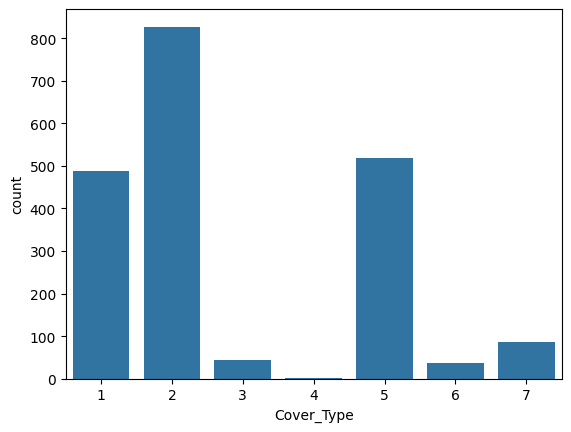

In [ ]:
#count plot of target
sb.countplot(x='Cover_Type', data=data)
plt.show()

In [ ]:
#Take some column
col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [ ]:
train = data[col]

# 4. Visualization

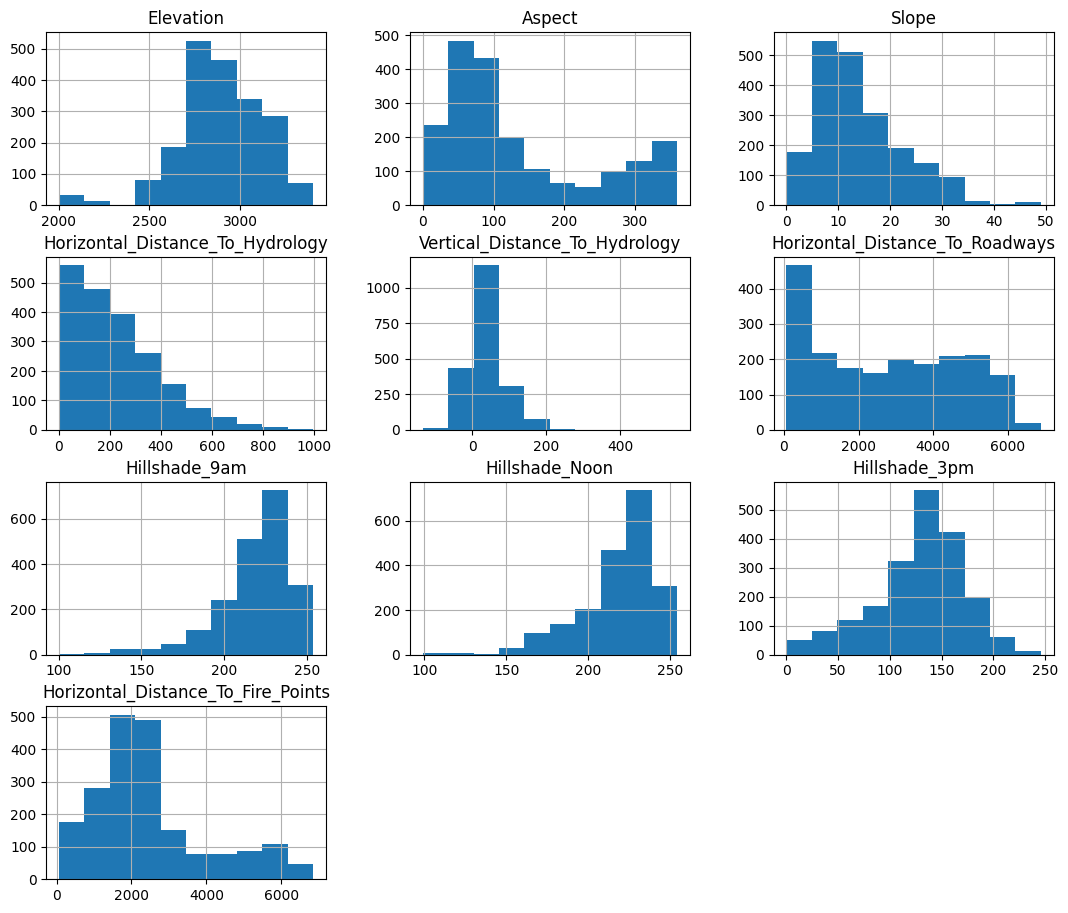

In [ ]:
#histogram
train.hist(figsize=(13, 11))
plt.show()

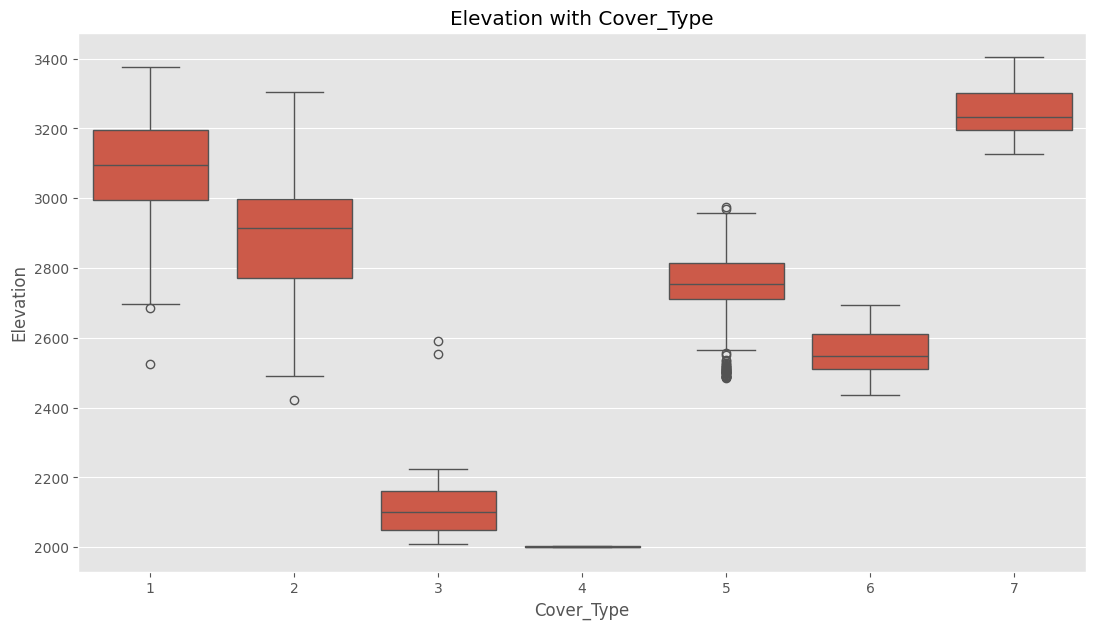

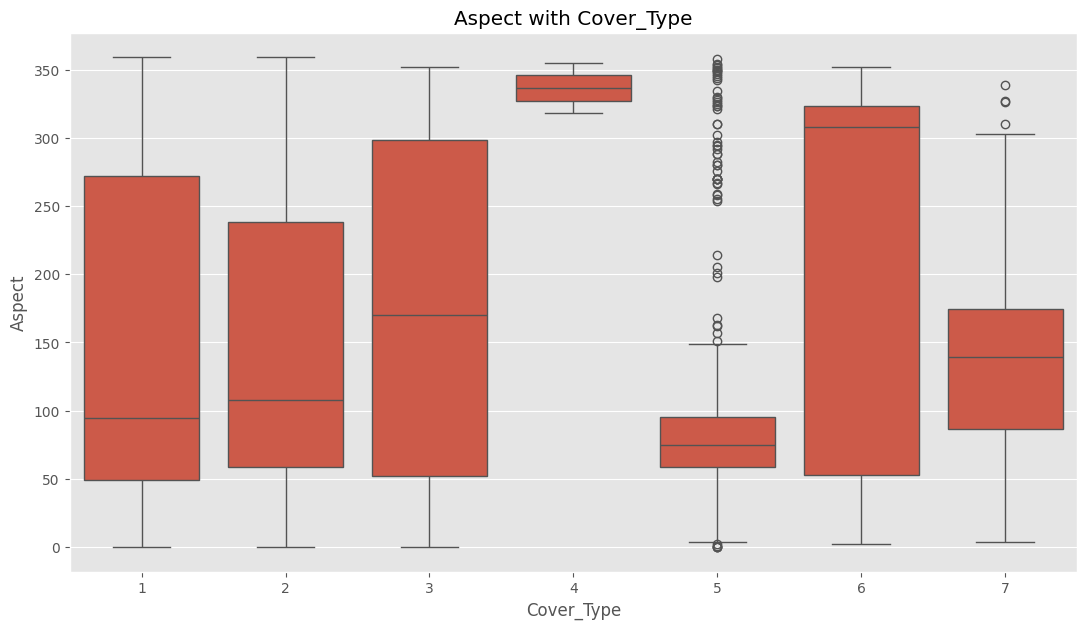

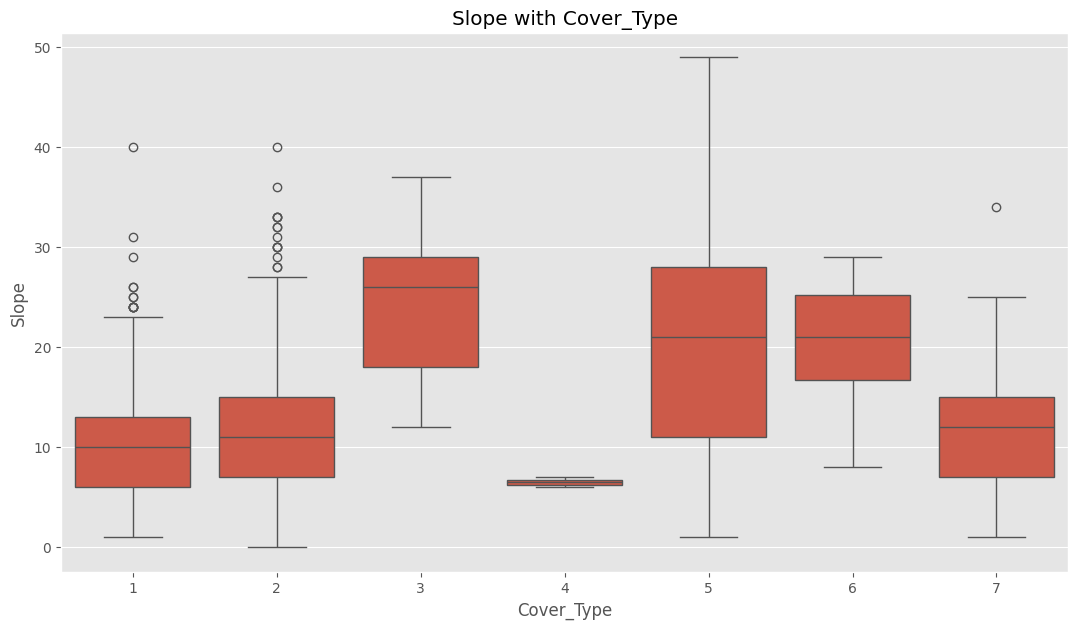

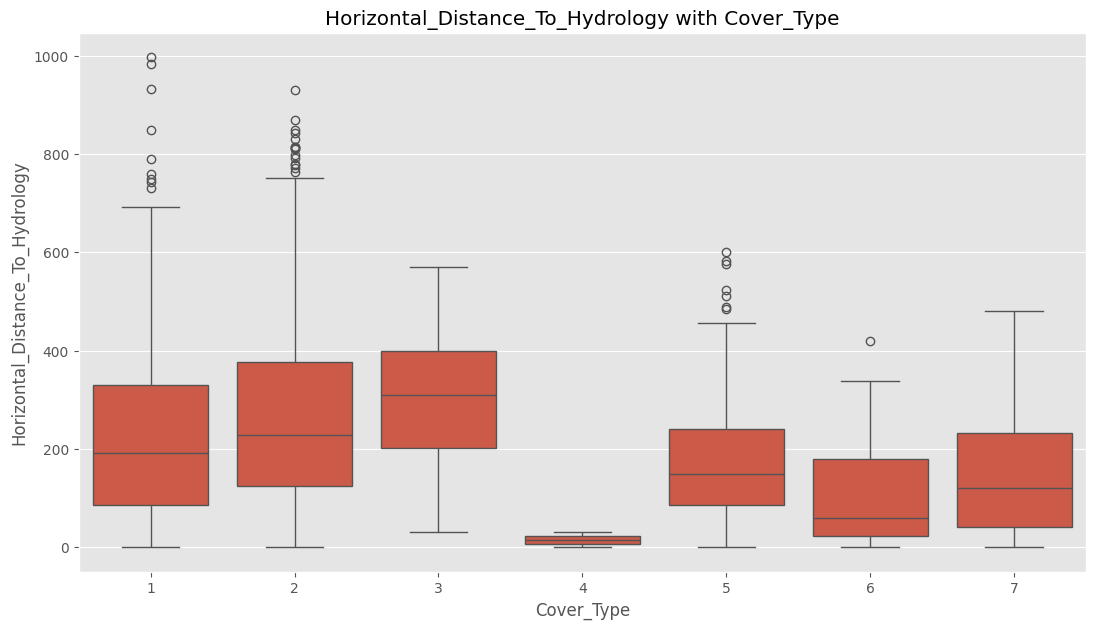

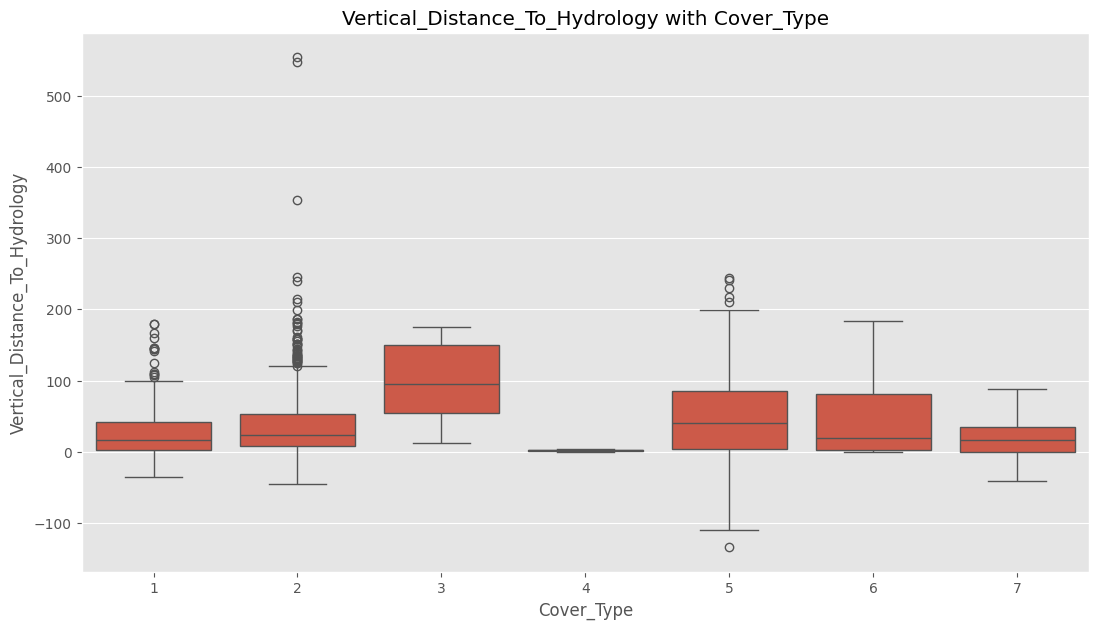

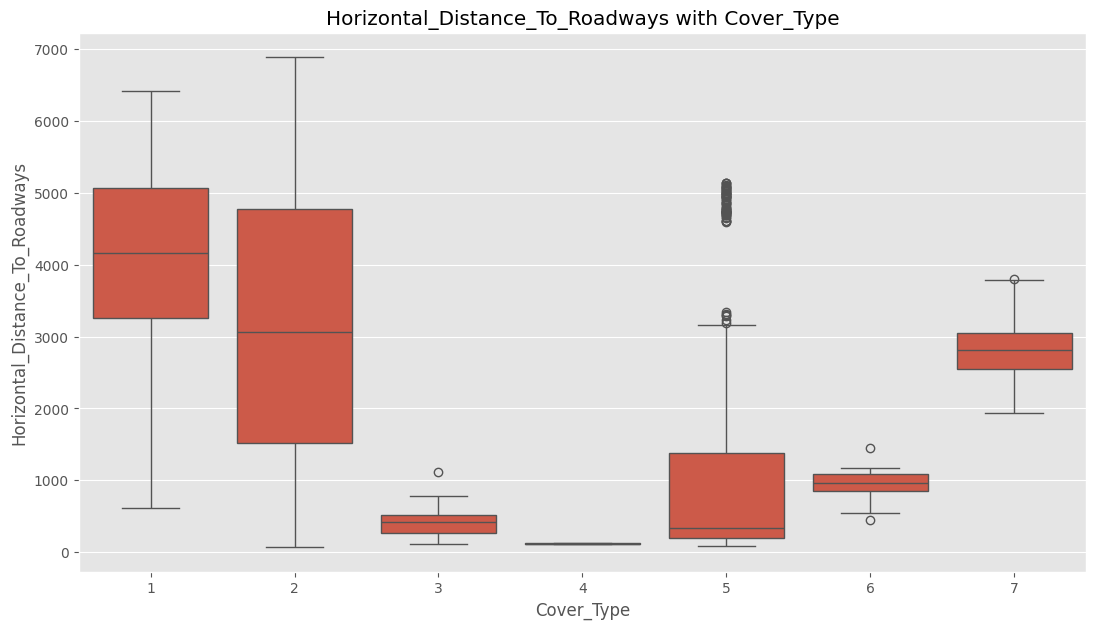

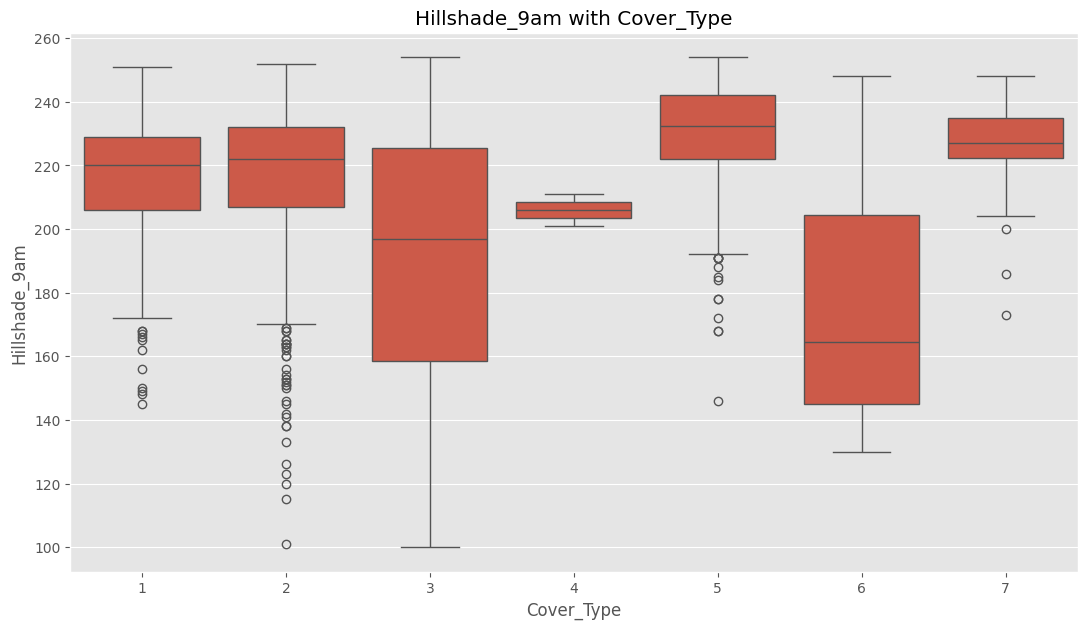

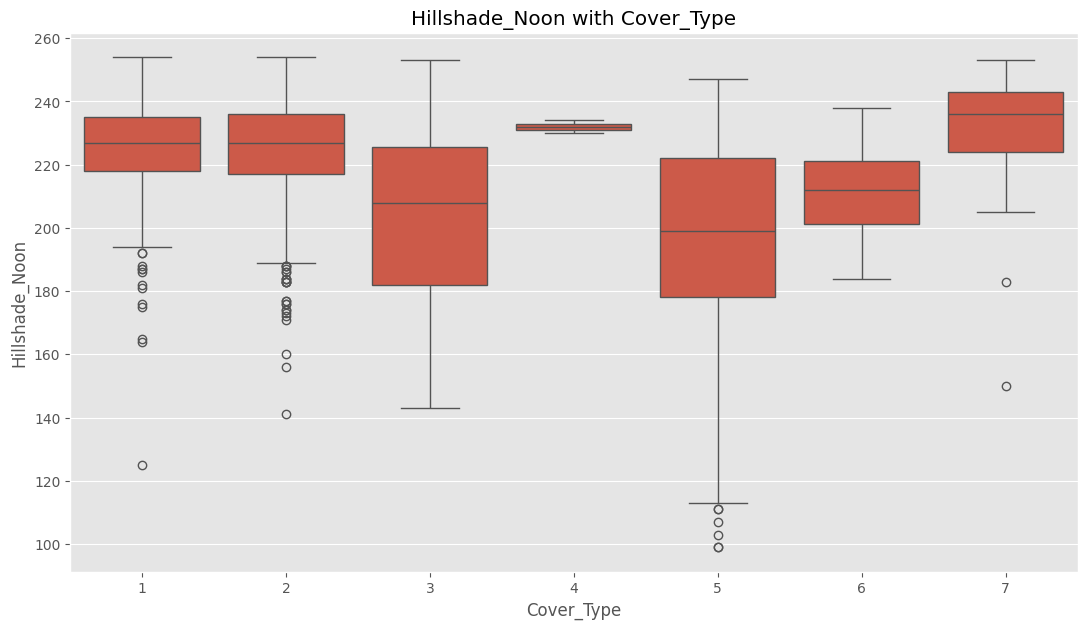

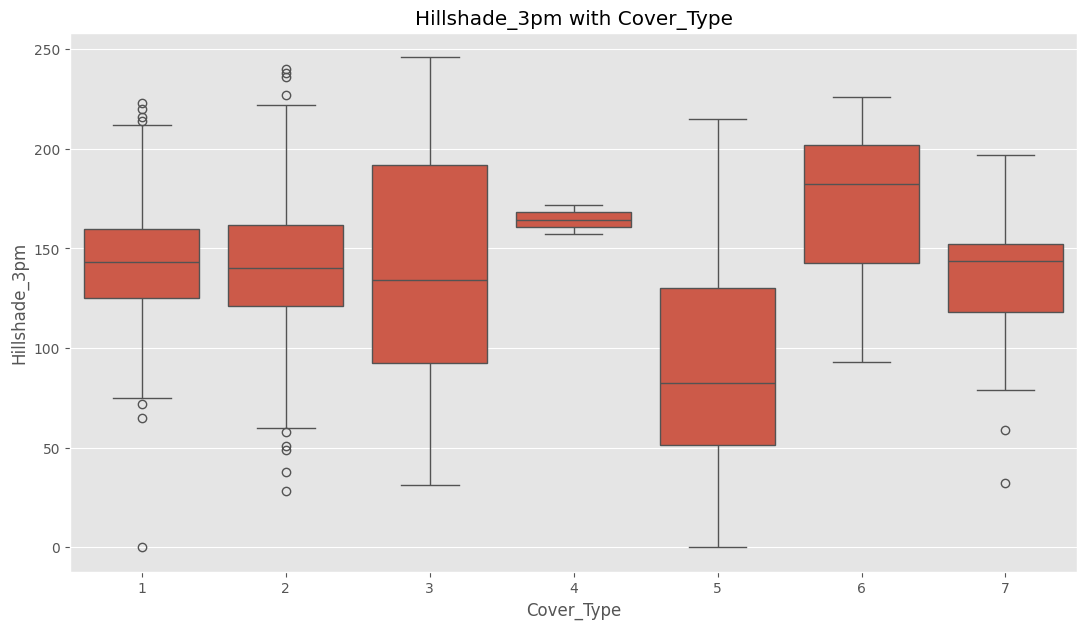

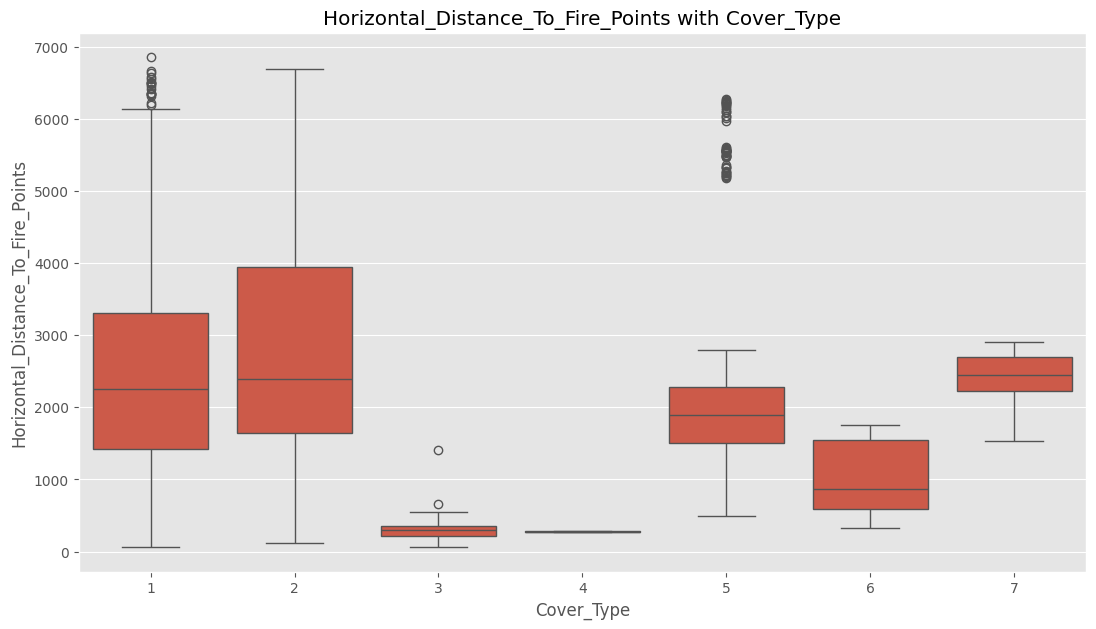

In [ ]:
#Boxplot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sb.boxplot(x=data.Cover_Type, y=train[i])
    plt.show()

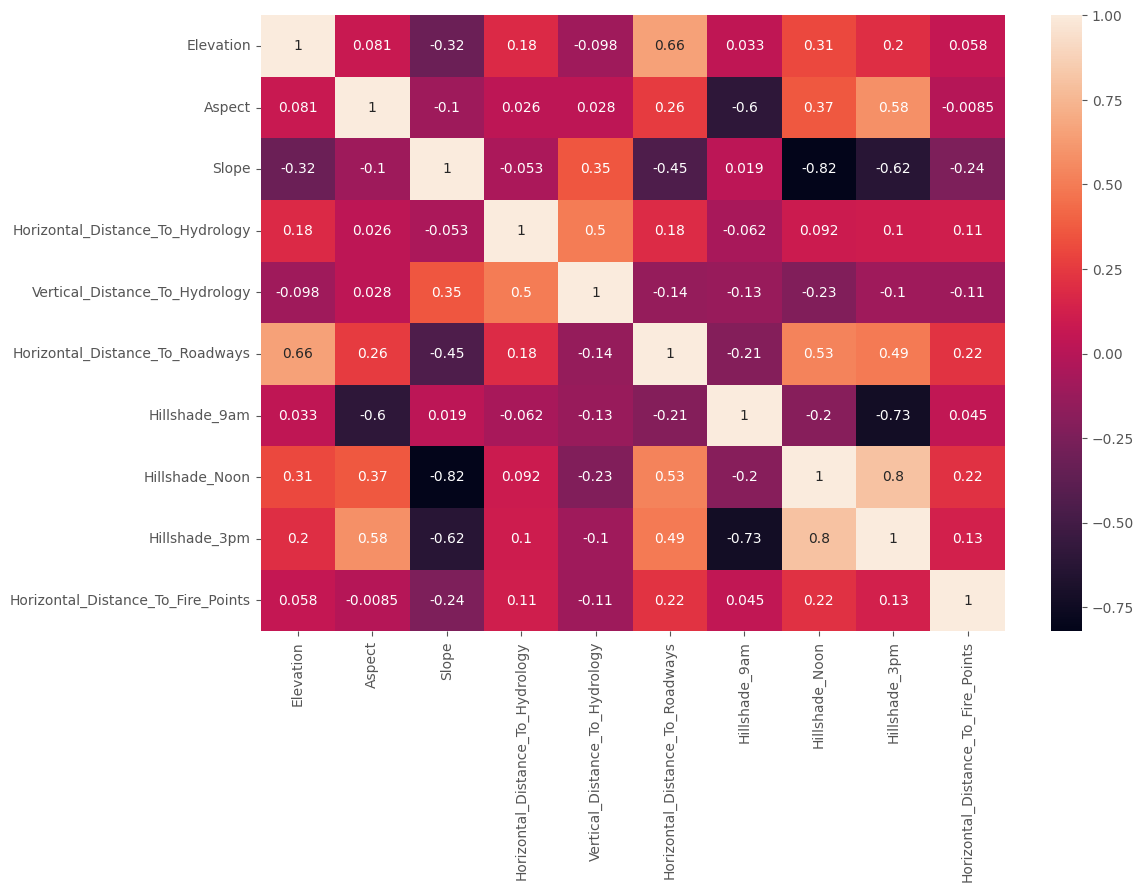

In [ ]:
#Corralation
plt.figure(figsize=(12, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

# 5. Feature Selection

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = data.iloc[:, :54] #Features of data
y = data.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature)

In [ ]:
#shape of new feature
X.shape

(2000, 12)

In [ ]:
#Split the data into test and train formate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 6. Ensemble Model

## 6.1 Decision Tree + Random Forest

### 6.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print("Accuracy -- ", dt.score(X_test, y_test)*100)

Accuracy --  78.8


### 6.2 Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

#fit
rf.fit(X_train, y_train)

#prediction
y_pred = rf.predict(X_test)

#score
print("Accuracy -- ", rf.score(X_test, y_test)*100)

Accuracy --  83.8


## 6.1 Decision Tree + Random Forest Modelling

Accuracy --  80.60000000000001


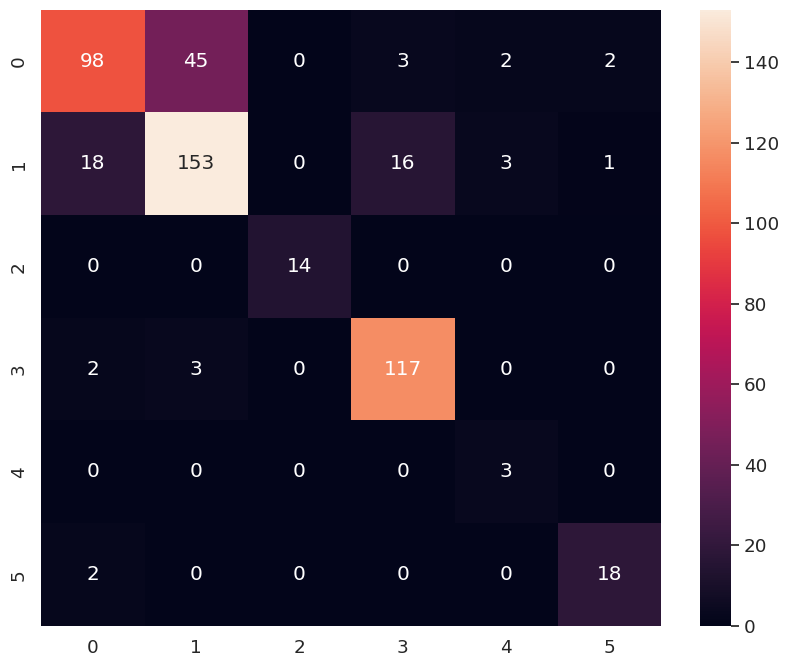

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model1 = VotingClassifier(estimators=[('decision_tree', dt), ('random_forest', rf)], voting='hard')

#fit
ensemble_model1.fit(X_train, y_train)

#prediction
y_pred = ensemble_model1.predict(X_test)

#score
print("Accuracy -- ", ensemble_model1.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

## 6.1 Decision Tree + Random Forest


# svm

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

#fit
svm_classifier.fit(X_train, y_train)

#prediction
y_pred = svm_classifier.predict(X_test)

#score
print("Accuracy -- ", svm_classifier.score(X_test, y_test)*100)

Accuracy --  71.8


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

#fit
knn_classifier.fit(X_train, y_train)

#prediction
y_pred = knn_classifier.predict(X_test)

#score
print("Accuracy -- ", knn_classifier.score(X_test, y_test)*100)

Accuracy --  82.19999999999999


Accuracy --  73.4


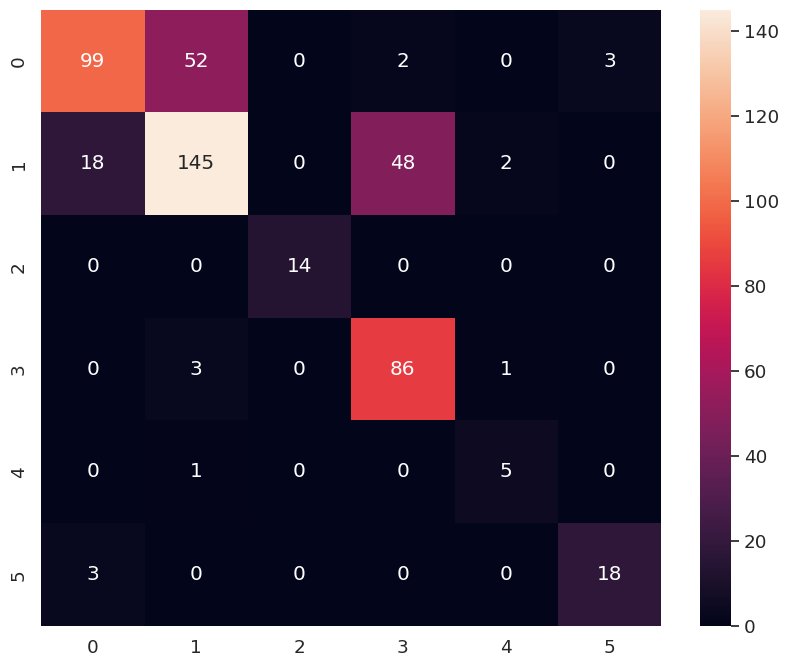

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model2 = VotingClassifier(estimators=[('svm', svm_classifier), ('knn', knn_classifier)], voting='hard')

#fit
ensemble_model2.fit(X_train, y_train)

#prediction
y_pred = ensemble_model2.predict(X_test)

#score
print("Accuracy -- ", ensemble_model2.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

#Deploy Model


- Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API.

Using pickle we can export our model and store in to `model.pkl` file, so we can ealy access this file and calculate customize prediction using Web App API.


### A little bit information about pickle:

`Pickle` is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions


>>  Here is example of the Pickle export model



```
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

In [ ]:
import pickle as pkl

In [ ]:
filename = 'ensembleModel1.pkl'
pkl.dump(ensemble_model1, open(filename, 'wb')) # wb means write as binary

filename = 'ensembleModel2.pkl'
pkl.dump(ensemble_model2, open(filename, 'wb')) # wb means write as binary

- To read model from file

```
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)

```

- To read model from file

```
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)

```